In [20]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install opencv-contrib-python
import cv2
print(os.listdir("input"))
import matplotlib.pyplot as plt
%matplotlib inline


['.DS_Store', 'test.csv', 'train.csv', 'train_images']


In [21]:
train_dir = 'input/train_images'
train_imgs = ['input/train_images/{}'.format(i) for i in os.listdir(train_dir)]

In [22]:
num_show = 15
columns = 5

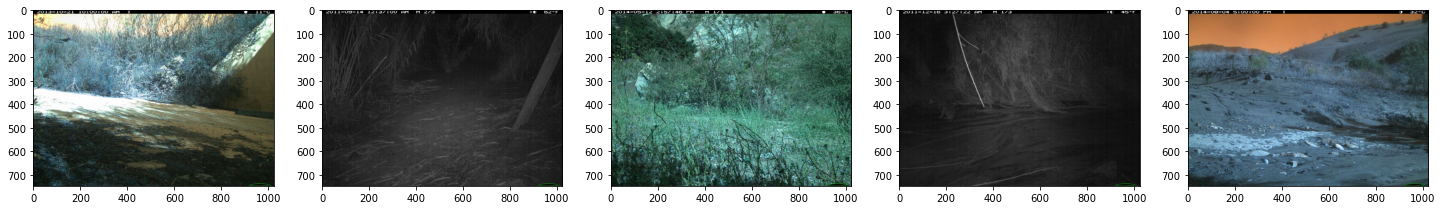

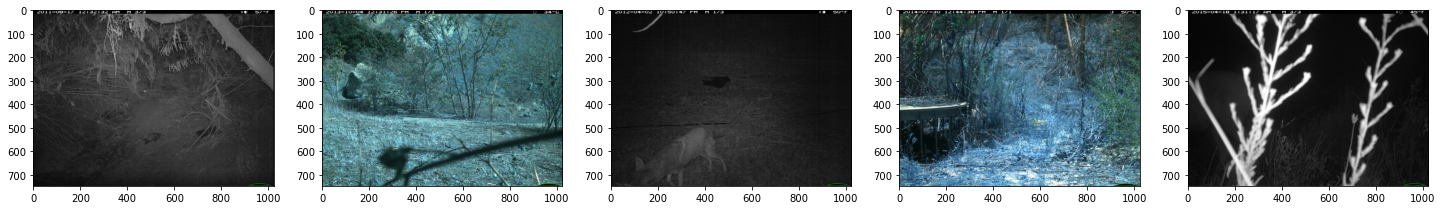

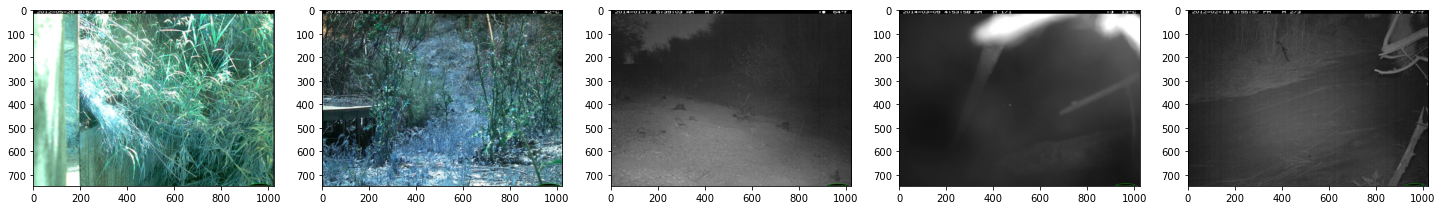

<Figure size 1800x864 with 0 Axes>

In [23]:
plt.figure(figsize=(25,12))
for idx, train_img in enumerate(train_imgs):
    if idx >= num_show:
        break
    
    temp_img = cv2.imread(train_img, cv2.IMREAD_COLOR)
    
    plt.subplot(10 // columns + 1, columns, idx + 1)
    plt.imshow(temp_img)
    if idx % 5 == 4:
        plt.show()
        plt.figure(figsize=(25,12))

# CLAHE(Contrast Limited Adaptive Histogram Equalization)
ref: https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

In [24]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))

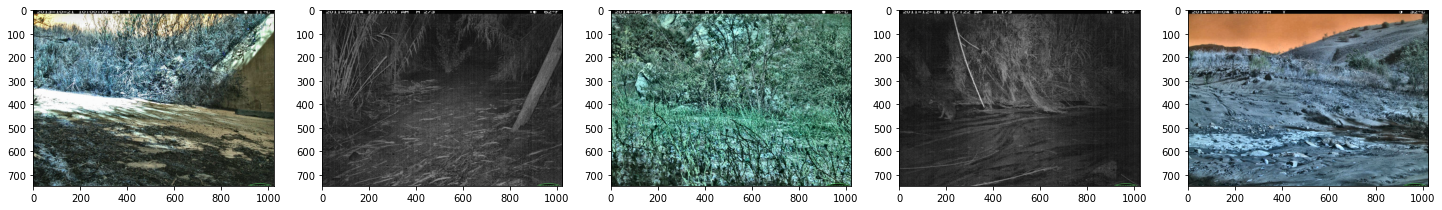

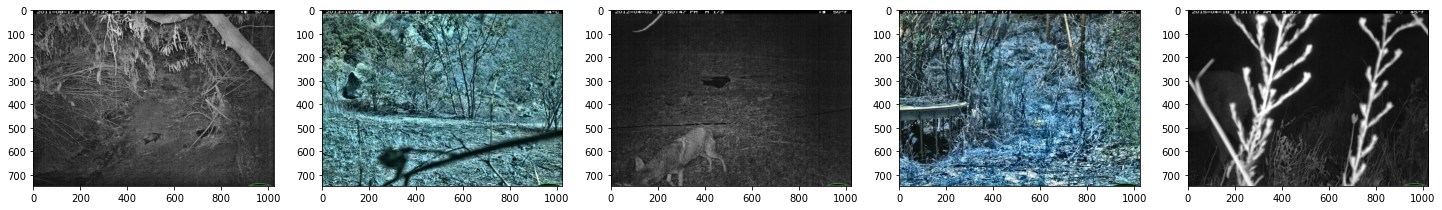

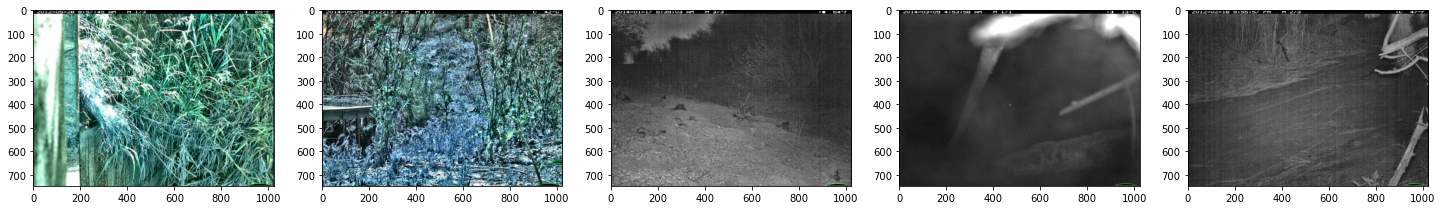

<Figure size 1800x864 with 0 Axes>

In [25]:
plt.figure(figsize=(25,12))
for idx, train_img in enumerate(train_imgs):
    if idx >= num_show:
        break
    
    temp_img = cv2.imread(train_img, cv2.IMREAD_COLOR)        
    img_lab = cv2.cvtColor(temp_img, cv2.COLOR_BGR2Lab)

    l, a, b = cv2.split(img_lab)
    img_l = clahe.apply(l)
    img_clahe = cv2.merge((img_l, a, b))

    img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_Lab2BGR)
    
    plt.subplot(10 // columns + 1, columns, idx + 1)
    plt.imshow(img_clahe)
    if idx % 5 == 4:
        plt.show()
        plt.figure(figsize=(25,12))

# Automatic White Balance
- Simple
- Grayworld
- Learning-based

Theses require __xphoto__ in 'opencv-contrib-python'

In [26]:
wb = cv2.xphoto.createSimpleWB()
wb.setP(0.4)

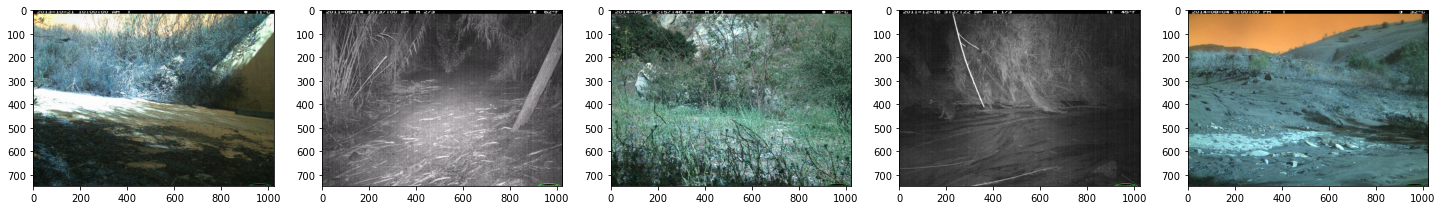

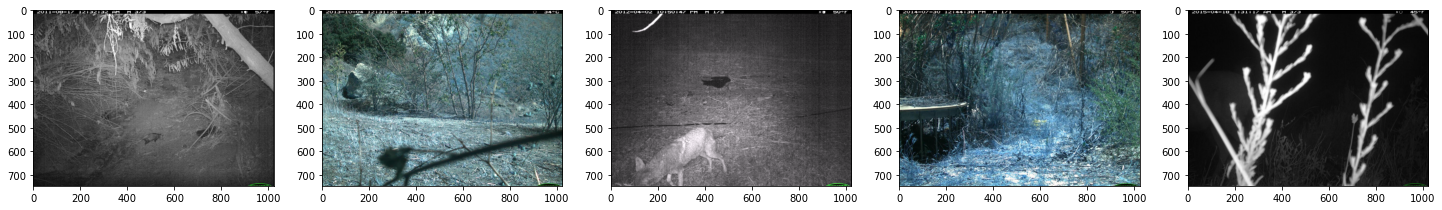

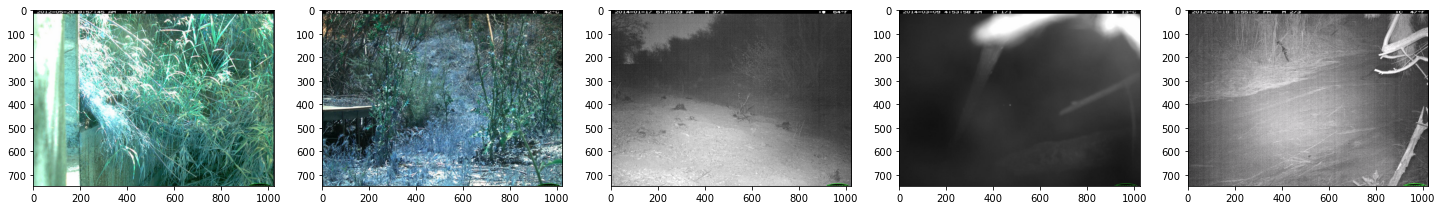

<Figure size 1800x864 with 0 Axes>

In [28]:
plt.figure(figsize=(25,12))
for idx, train_img in enumerate(train_imgs):
    if idx >= num_show:
        break
    
    temp_img = cv2.imread(train_img, cv2.IMREAD_COLOR)        
    
    img_wb = wb.balanceWhite(temp_img)
    
    plt.subplot(10 // columns + 1, columns, idx + 1)
    plt.imshow(img_wb)
    if idx % 5 == 4:
        plt.show()
        plt.figure(figsize=(25,12))

In [29]:
wb2 = cv2.xphoto.createGrayworldWB()
wb2.setSaturationThreshold(0.90)

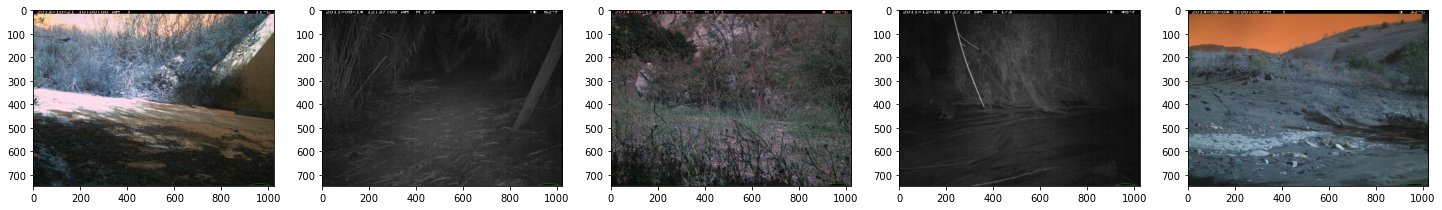

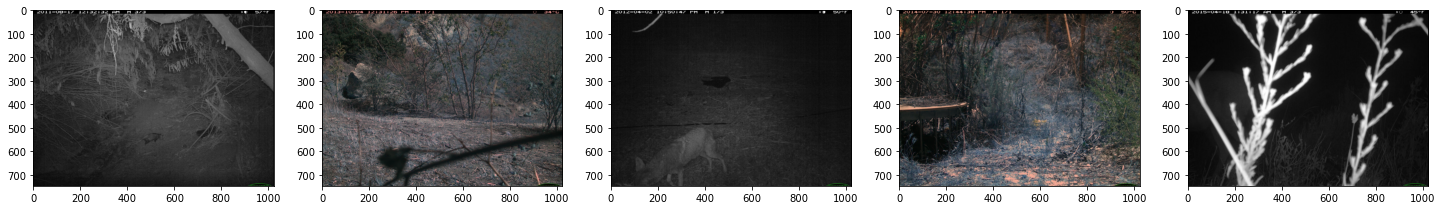

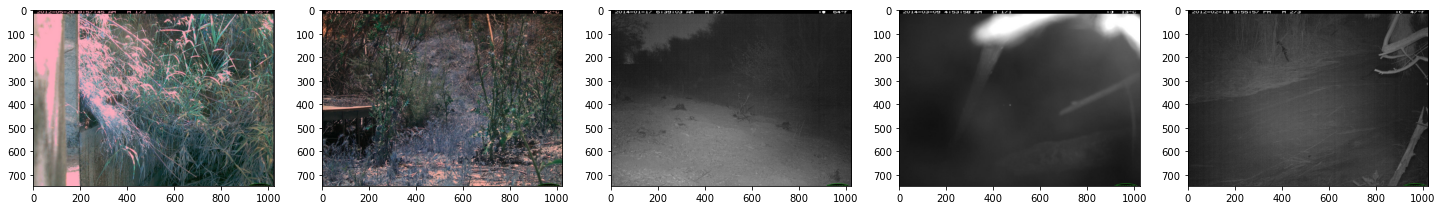

<Figure size 1800x864 with 0 Axes>

In [30]:
plt.figure(figsize=(25,12))
for idx, train_img in enumerate(train_imgs):
    if idx >= num_show:
        break
    
    temp_img = cv2.imread(train_img, cv2.IMREAD_COLOR)        
    
    img_wb = wb2.balanceWhite(temp_img)
    
    plt.subplot(10 // columns + 1, columns, idx + 1)
    plt.imshow(img_wb)
    if idx % 5 == 4:
        plt.show()
        plt.figure(figsize=(25,12))

In [ ]:
wb3 = cv2.xphoto.createLearningBasedWB()
wb3.setSaturationThreshold(0.99)

In [ ]:
plt.figure(figsize=(25,12))
for idx, train_img in enumerate(train_imgs):
    if idx >= num_show:
        break
    
    temp_img = cv2.imread(train_img, cv2.IMREAD_COLOR)        
    
    img_wb = wb3.balanceWhite(temp_img)
    
    plt.subplot(10 // columns + 1, columns, idx + 1)
    plt.imshow(img_wb)
    if idx % 5 == 4:
        plt.show()
        plt.figure(figsize=(25,12))

# CLAHE & Simple WB

In [ ]:
plt.figure(figsize=(25,12))
for idx, train_img in enumerate(train_imgs):
    if idx >= num_show:
        break
    
    temp_img = cv2.imread(train_img, cv2.IMREAD_COLOR)        
    
    img_wb = wb.balanceWhite(temp_img)

    img_lab = cv2.cvtColor(img_wb, cv2.COLOR_BGR2Lab)

    l, a, b = cv2.split(img_lab)
    res_l = clahe.apply(l)
    res = cv2.merge((res_l, a, b))

    res = cv2.cvtColor(res, cv2.COLOR_Lab2BGR)

    plt.subplot(10 / columns + 1, columns, idx + 1)
    plt.imshow(res)
    if idx % 5 == 4:
        plt.show()
        plt.figure(figsize=(25,12))

# Compare Original and Pre-processed with CLAHE & SimpleWB

In [ ]:
fig=plt.figure(figsize=(32, 128))
for idx, train_img in enumerate(train_imgs):
    if idx >= num_show:
        break
    
    temp_img = cv2.imread(train_img, cv2.IMREAD_COLOR)        
    
    img_wb = wb.balanceWhite(temp_img)

    img_lab = cv2.cvtColor(img_wb, cv2.COLOR_BGR2Lab)

    l, a, b = cv2.split(img_lab)
    res_l = clahe.apply(l)
    res = cv2.merge((res_l, a, b))

    res = cv2.cvtColor(res, cv2.COLOR_Lab2BGR)
    fig.add_subplot(15, 2, 2 * idx + 1)
    plt.imshow(temp_img)
    fig.add_subplot(15, 2, 2 * idx + 2)
    plt.imshow(res)
plt.show()

# To Do
- Vignetting Correction